# MGMTMSA 403 Assignment 4: Logistic Regression and Gradient Descent


# Problem 1

In [2]:
import numpy as np
from numpy import genfromtxt
import pandas as pd
import math
import matplotlib.pyplot as plt
# Load data
data = genfromtxt('LRTrain.csv', delimiter=',',skip_header = 1)
n = data.shape[0]
d = data.shape[1]-1
# get feature data
x = data[:,0:d]

# get label data
y = data[:,d]

# initialize weights
w = np.zeros(d)

## Define gradient function
def grad(w,x,y):
    g = np.zeros(d)
    for i in range(n):
        g = g + (1/(1+np.exp(np.dot(-w,x[i,:])))-y[i])*x[i,:]
    return (1/n)*g

## Define negative log likelihood function
def fval(w,x,y):
    v = 0;
    for i in range(n):
        v = v + (y[i]*np.log(1+np.exp(-np.dot(w,x[i,:]))) + (1-y[i])*np.log(1+np.exp(np.dot(w,x[i,:]))))
    return (1/n)*v

In [3]:
stepsize=0.00001
tol=0.5
T=2000
grads=[]
for i in range(T):
    curgrad=grad(w,x,y)
    if (np.linalg.norm(curgrad)>=tol):
        w=w-stepsize*curgrad
        grads.append(np.linalg.norm(curgrad))
    else:
        break
fval1=fval(w,x,y)
print(fval1)

0.23358128961163924


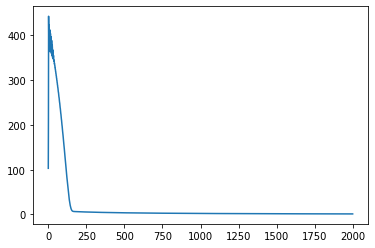

In [4]:
plt.plot(grads)

from this graph we can see that the norm of grad drops quickly and resides at a value near 0, so I checked the termination criteria 0.1,0.2,0.5

In [5]:
stepsize=0.00001
tol=0.1

w = np.zeros(d)
curgrad=grad(w,x,y)
T=0
while (np.linalg.norm(curgrad)>=tol):
    w=w-stepsize*curgrad
    curgrad=grad(w,x,y)
    T=T+1
fval1=fval(w,x,y)
print(fval1)
print(T)

0.17025425322914867
239905


In [6]:
stepsize=0.00001
tol=0.2
w = np.zeros(d)
curgrad=grad(w,x,y)
T=0
while (np.linalg.norm(curgrad)>=tol):
    w=w-stepsize*curgrad
    curgrad=grad(w,x,y)
    T=T+1
fval1=fval(w,x,y)
print(fval1)
print(T)

0.2055259929515012
20361


In [7]:
stepsize=0.00005
tol=0.1
w = np.zeros(d)
curgrad=grad(w,x,y)
T=0
while (np.linalg.norm(curgrad)>=tol):
    w=w-stepsize*curgrad
    curgrad=grad(w,x,y)
    T=T+1
fval1=fval(w,x,y)
print(fval1)
print(T)

0.13385619716798722
252862


# Problem 2

In [8]:

ts=np.arange(0,1.1,0.1)

In [14]:
data = genfromtxt('LRTest.csv', delimiter=',',skip_header = 1)
data2=data[:,:30]
values=[]
for i in range(len(ts)):
    t=ts[i]
    yhat=[]
    #math.exp(-np.transpose(w)*data2[i,:])
    for i in range(len(data2)):
        predict=1/(1+math.exp(-np.dot(np.transpose(w),data2[i,:]))) 
        if predict>t:
            yhat.append(1)
        else:
            yhat.append(0)
    TPR=(sum((yhat==data[:,30])&yhat==1)/sum(data[:,30]==1))#TP
    FPR=(sum((yhat!=data[:,30])&yhat==1)/sum(data[:,30]==0))#FP
    TNR = 1-FPR
    FNR = 1-TPR 
    b=[t,TPR,FPR,TNR,FNR]
    values.append(b)

In [15]:
df2 = pd.DataFrame(np.array(values),columns=["t","TPR","FPR","TNR","FNR"])
df2.set_index('t',inplace=True)
df2.head(n=12)


,TPR,FPR,TNR,FNR
t,,,,
0.0,1.000000,1.000000,0.000000,0.000000
0.1,0.969388,0.210526,0.789474,0.030612
0.2,0.959184,0.128655,0.871345,0.040816
0.3,0.948980,0.105263,0.894737,0.051020
0.4,0.938776,0.058480,0.941520,0.061224
0.5,0.918367,0.046784,0.953216,0.081633
0.6,0.897959,0.035088,0.964912,0.102041
0.7,0.867347,0.035088,0.964912,0.132653
0.8,0.857143,0.023392,0.976608,0.142857


In [16]:
export_excel = df2.to_excel (r'Assignment4.xlsx', index = True, header=True)